<a href="https://colab.research.google.com/github/PoojaPushparajShetty/Assignment-Submission/blob/main/_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data= pd.read_csv('/content/cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


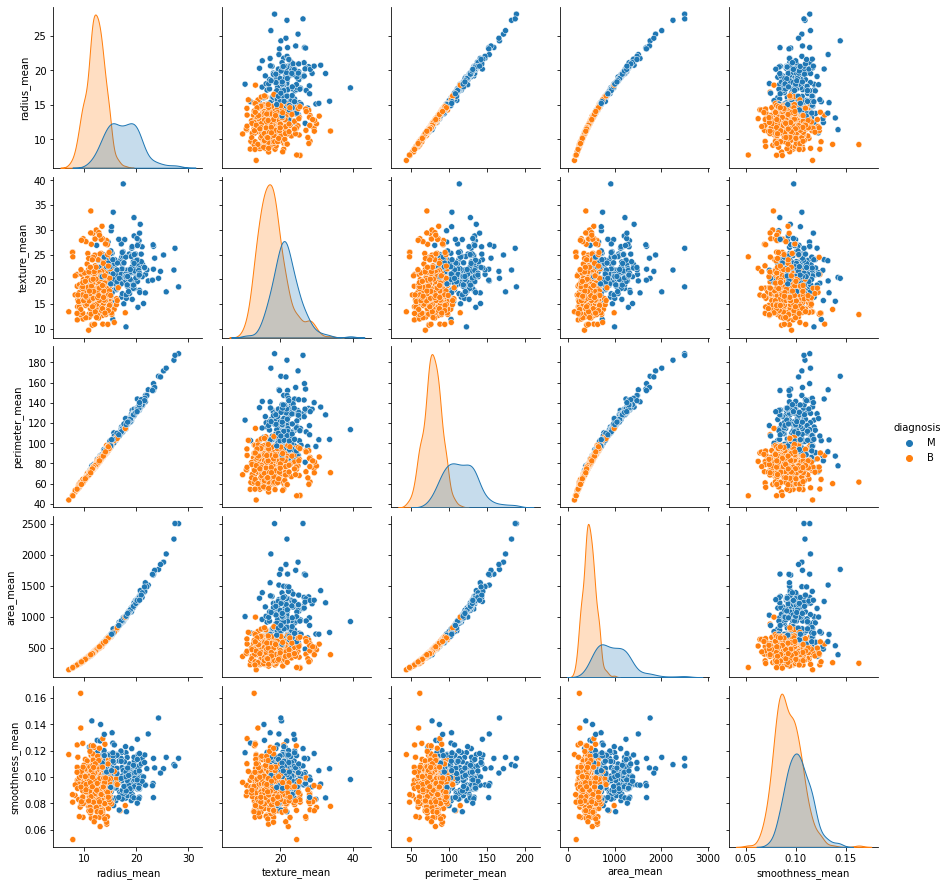

In [ ]:
sns.pairplot(data,hue='diagnosis', vars = ['radius_mean' ,'texture_mean','perimeter_mean','area_mean','smoothness_mean'])

Here Blue color indicates Malignant condition the person has cancer Orange indicates Bengin condition the person doesnot have cancer.

To check the correlation between the features

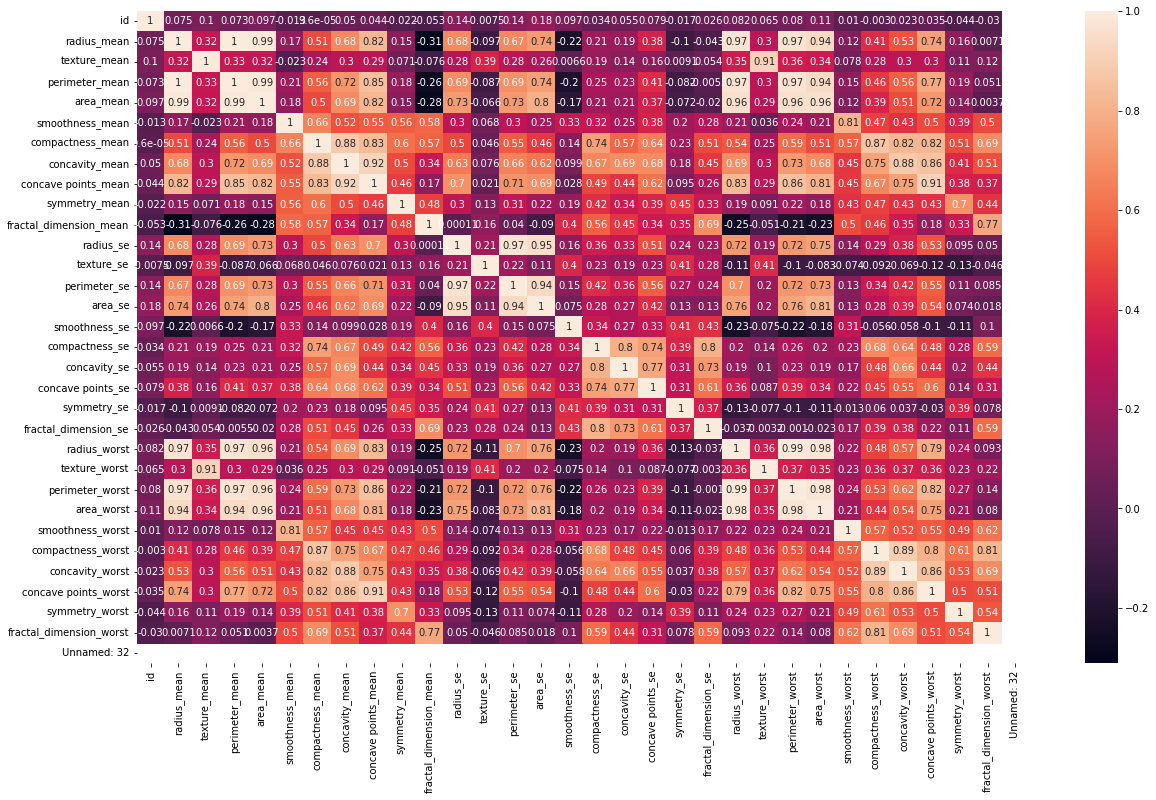

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)


Training Testing

In [ ]:
x=data.drop(columns=['diagnosis','Unnamed: 32'])
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y=data['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=20)

In [ ]:
print ('The size of our training x (input feature) is', x_train.shape)
print('\n')
print ('The size of our testing x (input feature) is', x_test.shape)
print('\n')
print ('The size of our training y (input feature) is', y_train.shape)
print('\n')
print ('The size of our testing y (input feature) is', y_train.shape)
print('\n')



The size of our training x (input feature) is (455, 31)


The size of our testing x (input feature) is (114, 31)


The size of our training y (input feature) is (455,)


The size of our testing y (input feature) is (455,)




 SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(x_train, y_train)

SVC()

In [ ]:
y_predict= svc_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=np.array(confusion_matrix(y_test,y_predict, labels=['B','M']))
confusion = pd.DataFrame(cm, index=['is_cancer','is healthy'],
                         columns=['predicted cancer','predicted_healthy'])
confusion

,predicted cancer,predicted_healthy
is_cancer,66,0
is healthy,48,0


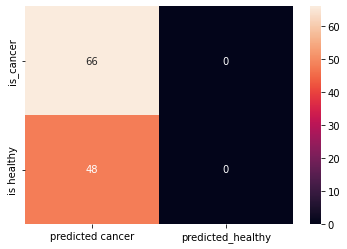

In [ ]:
sns.heatmap(confusion,annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.58      1.00      0.73        66
           M       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NORMALISING TRAINING DATA

In [ ]:
x_train_min = x_train.min()
x_train_min

id                         8670.000000
radius_mean                   6.981000
texture_mean                 10.380000
perimeter_mean               43.790000
area_mean                   143.500000
smoothness_mean               0.052630
compactness_mean              0.019380
concavity_mean                0.000000
concave points_mean           0.000000
symmetry_mean                 0.106000
fractal_dimension_mean        0.049960
radius_se                     0.111500
texture_se                    0.360200
perimeter_se                  0.757000
area_se                       6.802000
smoothness_se                 0.001713
compactness_se                0.002252
concavity_se                  0.000000
concave points_se             0.000000
symmetry_se                   0.007882
fractal_dimension_se          0.000895
radius_worst                  7.930000
texture_worst                12.490000
perimeter_worst              50.410000
area_worst                  185.200000
smoothness_worst         

In [ ]:
x_train_max = x_train.max()
x_train_max

id                         9.113205e+08
radius_mean                2.811000e+01
texture_mean               3.928000e+01
perimeter_mean             1.885000e+02
area_mean                  2.501000e+03
smoothness_mean            1.447000e-01
compactness_mean           3.454000e-01
concavity_mean             4.268000e-01
concave points_mean        2.012000e-01
symmetry_mean              3.040000e-01
fractal_dimension_mean     9.296000e-02
radius_se                  2.873000e+00
texture_se                 4.885000e+00
perimeter_se               2.198000e+01
area_se                    5.422000e+02
smoothness_se              3.113000e-02
compactness_se             1.354000e-01
concavity_se               3.960000e-01
concave points_se          5.279000e-02
symmetry_se                7.895000e-02
fractal_dimension_se       2.984000e-02
radius_worst               3.604000e+01
texture_worst              4.954000e+01
perimeter_worst            2.512000e+02
area_worst                 4.254000e+03


In [ ]:
x_train_range = (x_train_max- x_train_min)
x_train_range

id                         9.113118e+08
radius_mean                2.112900e+01
texture_mean               2.890000e+01
perimeter_mean             1.447100e+02
area_mean                  2.357500e+03
smoothness_mean            9.207000e-02
compactness_mean           3.260200e-01
concavity_mean             4.268000e-01
concave points_mean        2.012000e-01
symmetry_mean              1.980000e-01
fractal_dimension_mean     4.300000e-02
radius_se                  2.761500e+00
texture_se                 4.524800e+00
perimeter_se               2.122300e+01
area_se                    5.353980e+02
smoothness_se              2.941700e-02
compactness_se             1.331480e-01
concavity_se               3.960000e-01
concave points_se          5.279000e-02
symmetry_se                7.106800e-02
fractal_dimension_se       2.894520e-02
radius_worst               2.811000e+01
texture_worst              3.705000e+01
perimeter_worst            2.007900e+02
area_worst                 4.068800e+03


In [ ]:
x_train_scaled =(x_train - x_train_min) / (x_train_range)
x_train_scaled.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
412,0.000984,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.999973,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.100838,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.000994,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.000919,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


Normalizing the training data

In [ ]:
x_test_min = x_test.min()
x_test_range = (x_test - x_test_min).max()
x_test_scaled = (x_test - x_test_min)/x_test_range 

Training the SVM model


In [ ]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)

SVC()

In [ ]:
y_predict = svc_model.predict(x_test_scaled)
cm= confusion_matrix(y_test,y_predict)

In [ ]:
cm=np.array(confusion_matrix(y_test,y_predict, labels=['B','M']))
confusion = pd.DataFrame(cm, index=['is_cancer','is healthy'],
                         columns=['predicted cancer','predicted_healthy'])
confusion

,predicted cancer,predicted_healthy
is_cancer,62,4
is healthy,0,48


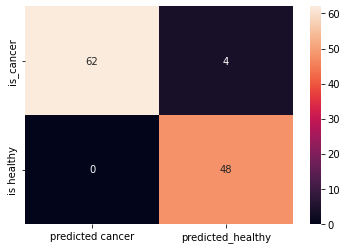

In [ ]:
sns.heatmap(confusion,annot=True)

**SUMMARY**

From the above plot we understand that who were having cancer and predicted cancer is 62 and those who were having cancer and predicted healthy were 4. Those who were healthy and predicted cancer were 0 and those who were healthy and predicted cancer was 48. We got better SVM model than the previous model after normalising the data.
